In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import digamma
from sklearn.neighbors import KDTree, BallTree
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import numpy.linalg as la
from numpy import log
from scipy.special import digamma
from sklearn.neighbors import BallTree, KDTree
import sklearn

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def reset():
    f =  ['AMG', 'CAR', 'CF1', 'CF3', 'CF4',
            'Others', 'GLI', 'LIN', 'LIP', 'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL',
            'QUI', 'SUL', 'MV hours', 'Acinet$_{pc}$', 'Enterobac$_{pc}$', 'Enteroc$_{pc}$',
            'Pseud$_{pc}$', 'Staph$_{pc}$', 'Others$_{pc}$', 'ICU$_{hours}$',
            '# pat$_{atb}$', '# pat$_{MDR}$',
            'CAR$_{n}$', 'PAP$_{n}$', 
            'Others$_{n}$', 'QUI$_{n}$',
            'OXA$_{n}$', 'PEN$_{n}$', 'CF3$_{n}$', 'GLI$_{n}$',
            'CF4$_{n}$', 'SUL$_{n}$', 'NTI$_{n}$', 'LIN$_{n}$',
            'AMG$_{n}$', 'MAC$_{n}$', 'CF1$_{n}$', 'POL$_{n}$',
            'LIP$_{n}$', '# pat$_{tot}$' ,'Post change',
            'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'Hepatic$_{fail}$',
            'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
            'Respiratory$_{fail}$', 'Multiorganic$_{fail}$',  '# transfusions',
            'Vasoactive drug', 'Dosis nems', 'Tracheo$_{hours}$', 'Ulcer$_{hours}$',
            'Hemo$_{hours}$', 'C01 PIVC 1',
            'C01 PIVC 2', 'C02 CVC - RJ',
            'C02 CVC - RS', 'C02 CVC - LS', 'C02 CVC - RF',
            'C02 CVC - LJ', 'C02 CVC - LF', '# catheters']

    tf =  ['discreta', 'discreta', 'discreta', 'discreta', 'discreta', 
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'continua', 'discreta',  
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta',
                        'discreta', 'continua', 'discreta', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua','continua']
    
    return f, tf

def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
def plot_dataframe(df, path):
    features, tipos_variables = reset()
    
    reordered_df = pd.DataFrame()  # Empty DataFrame to store reorganized rows
    for i in range(0, len(df), len(features)):
        group = df.iloc[i:i+len(features)]  # Get the group of rows
        reordered_group = group.set_index('Feature').reindex(features).reset_index()  # Reorder rows based on features
        if i == 0:
            reordered_df = pd.concat([reordered_df, reordered_group])  # Concatenate the reordered group to the final DataFrame
        else:
            reordered_df = pd.concat([reordered_df, reordered_group[['MI Value']]], axis=1)  # Concatenate the reordered group to the final DataFrame
    
    reordered_df = reordered_df.drop(["Feature"], axis=1)
    reordered_df.columns = np.arange(0, reordered_df.shape[1], 1)

    scaler = MinMaxScaler()
    reordered_df = pd.DataFrame(scaler.fit_transform(reordered_df), columns=reordered_df.columns)

    feature_idx = {feature: idx for idx, feature in enumerate(features)}
    reordered_indices = [feature_idx[feature] for feature in new_order if feature in feature_idx]
    
    reordered_data = reordered_df.iloc[reordered_indices, :]
    
    plt.figure(figsize=(11,22))
    ax = plt.gca()
    heatmap = sns.heatmap(reordered_data, cmap='viridis', yticklabels=new_order, xticklabels=range(1,15), ax=ax, cbar=False)
    
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=22)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=22, rotation=90)

    # Crear barra de color
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = heatmap.figure.colorbar(heatmap.collections[0], cax=cax)
    cbar.ax.tick_params(labelsize=22)

    # Configurar ticks personalizados en la barra de color
    num_ticks = 10
    tick_locs = np.linspace(reordered_data.values.min(), reordered_data.values.max(), num_ticks)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels([f'{tick:.1f}' for tick in tick_locs])
    cbar.ax.tick_params(labelsize=22)

    plt.tight_layout(pad=0)
    plt.savefig(path, bbox_inches='tight', pad_inches=0)

    plt.show()

# VISUALIZATION

In [3]:
new_order = ['AMG', 'CAR', 'CF1', 'CF3', 'CF4',
            'Others', 'GLI', 'LIN', 'LIP', 'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL',
            'QUI', 'SUL','# pat$_{atb}$', '# pat$_{MDR}$', '# pat$_{tot}$', 'CAR$_{n}$', 'PAP$_{n}$', 
            'Others$_{n}$', 'QUI$_{n}$',
            'OXA$_{n}$', 'PEN$_{n}$', 'CF3$_{n}$', 'GLI$_{n}$',
            'CF4$_{n}$', 'SUL$_{n}$', 'NTI$_{n}$', 'LIN$_{n}$',
            'AMG$_{n}$', 'MAC$_{n}$', 'CF1$_{n}$', 'POL$_{n}$',
            'LIP$_{n}$', 'Acinet$_{pc}$', 'Enterobac$_{pc}$', 'Enteroc$_{pc}$',
            'Pseud$_{pc}$', 'Staph$_{pc}$', 'Others$_{pc}$',
            'Post change',
            'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'MV hours', 'Respiratory$_{fail}$','Hepatic$_{fail}$',
            'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
            'Multiorganic$_{fail}$', '# transfusions',
            'Vasoactive drug', 'Dosis nems', 'Tracheo$_{hours}$', 'Ulcer$_{hours}$',
            'Hemo$_{hours}$', 'ICU$_{hours}$', 'C01 PIVC 1',
            'C01 PIVC 2', 'C02 CVC - RJ',
            'C02 CVC - RS', 'C02 CVC - LS', 'C02 CVC - RF',
            'C02 CVC - LJ', 'C02 CVC - LF', '# catheters']

# MDR

In [4]:
import pickle
split_directory = "./Results_CMI"

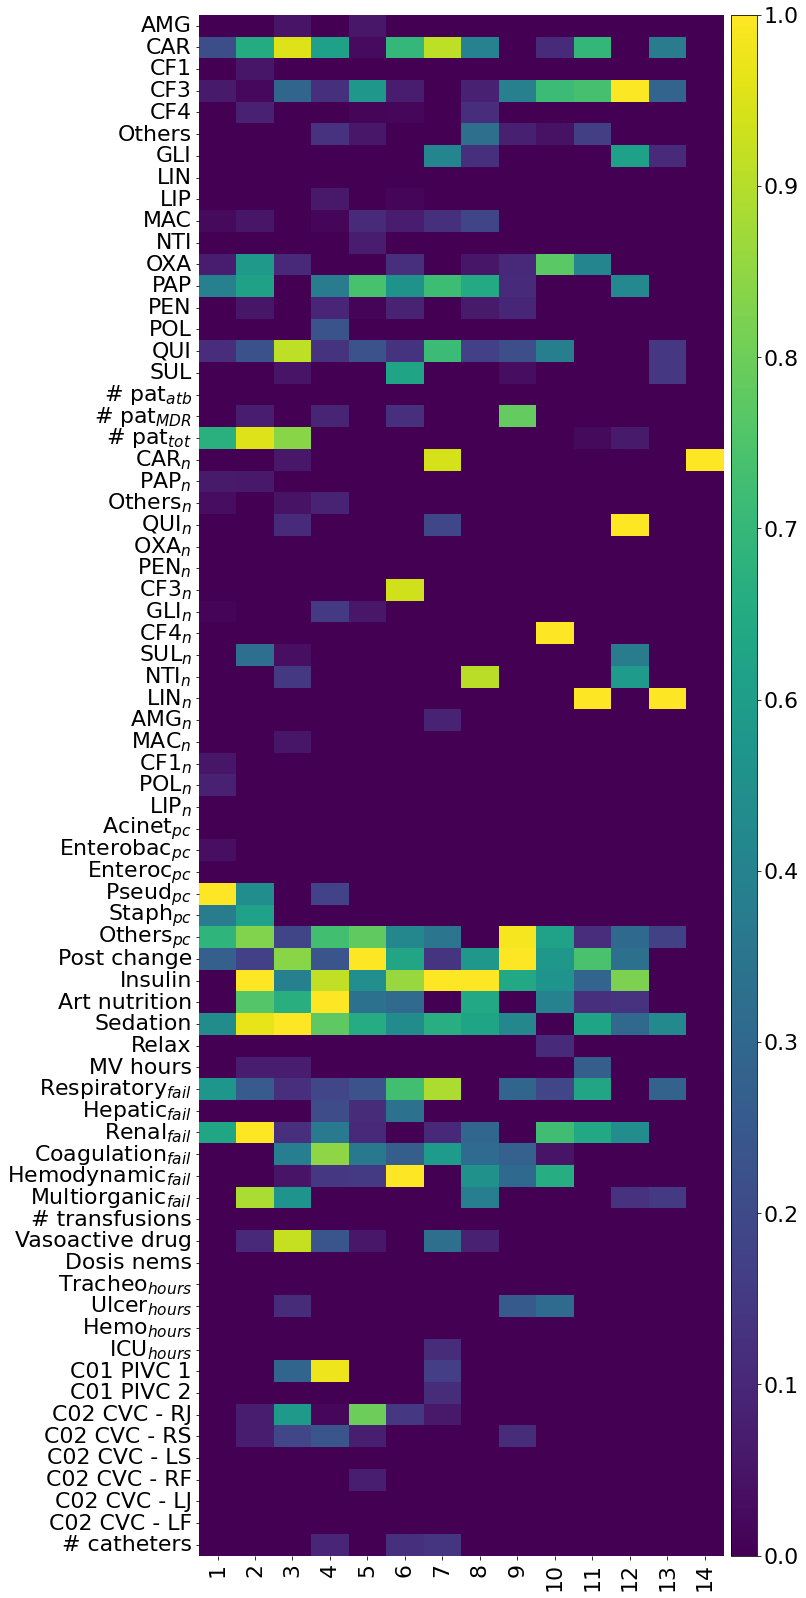

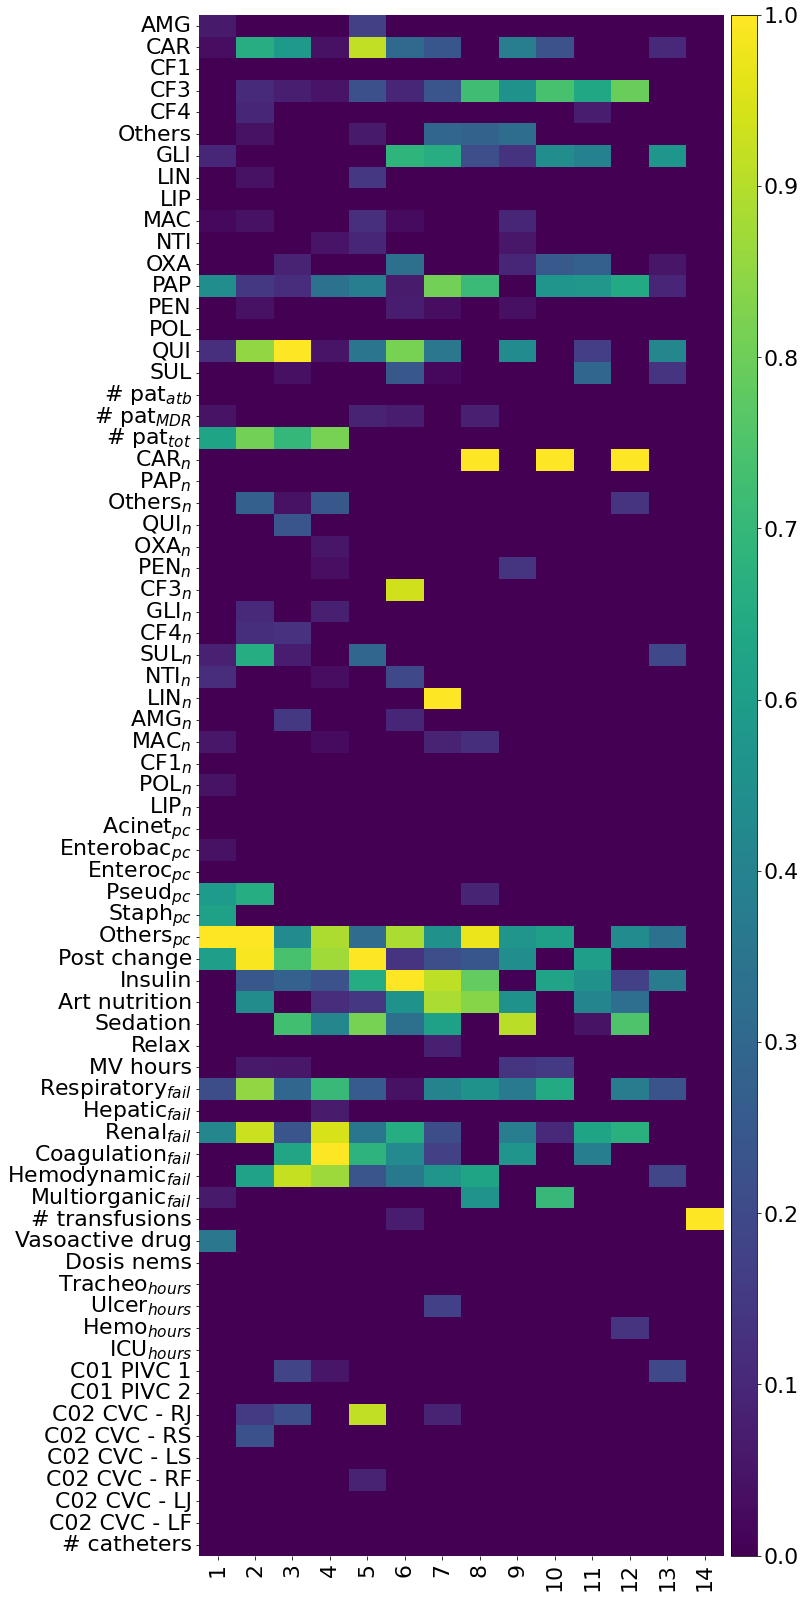

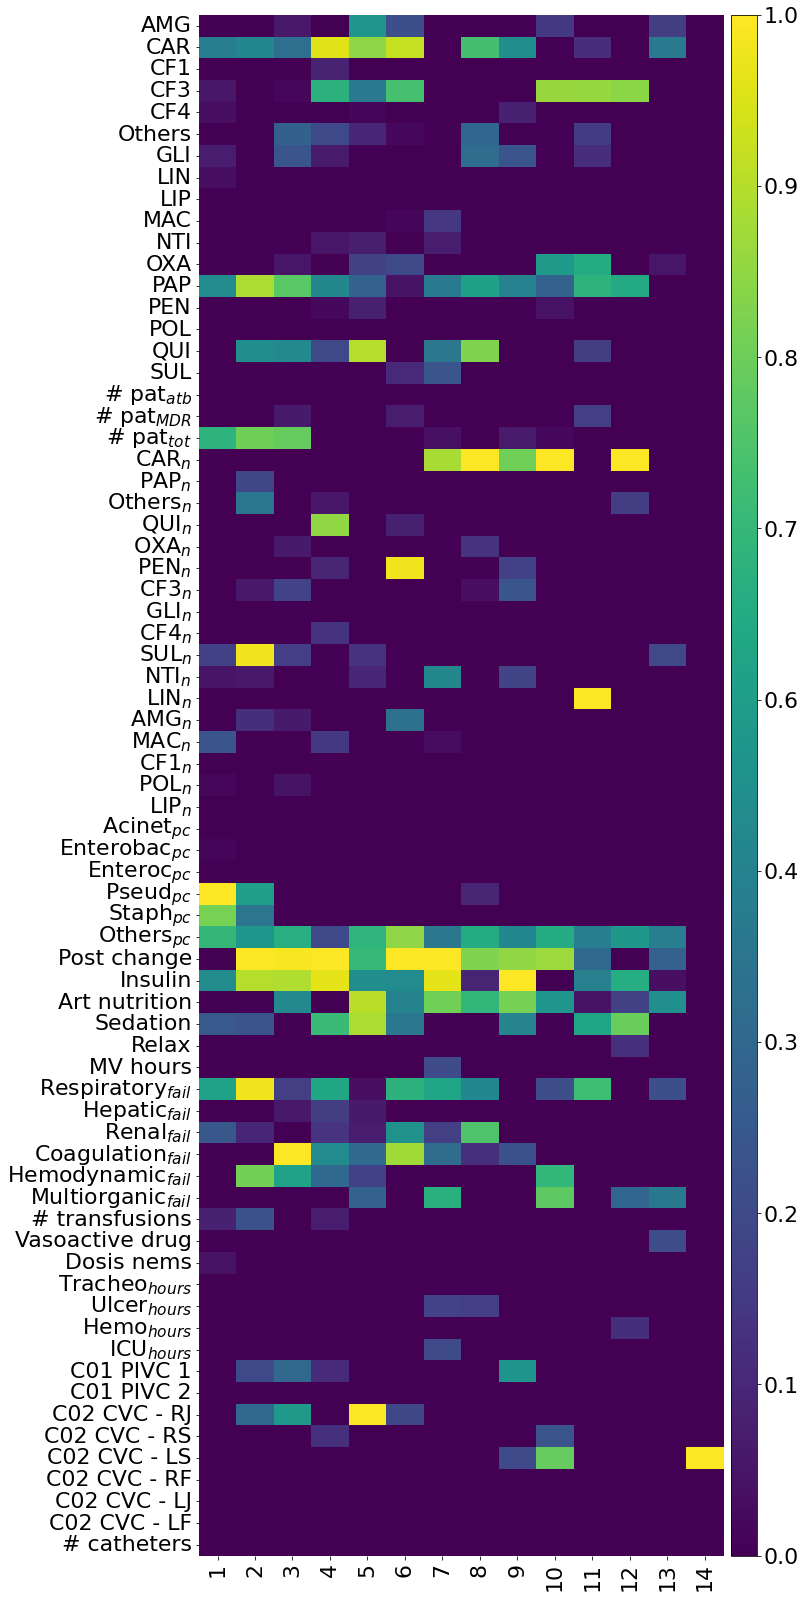

In [5]:
results_amr = load_from_pickle(os.path.join(split_directory, f"CMI_results_amr.pkl"))
for split in range(1,4):
    df = results_amr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures_VF/CMI-S{split}_mdr.pdf')

# Non MDR

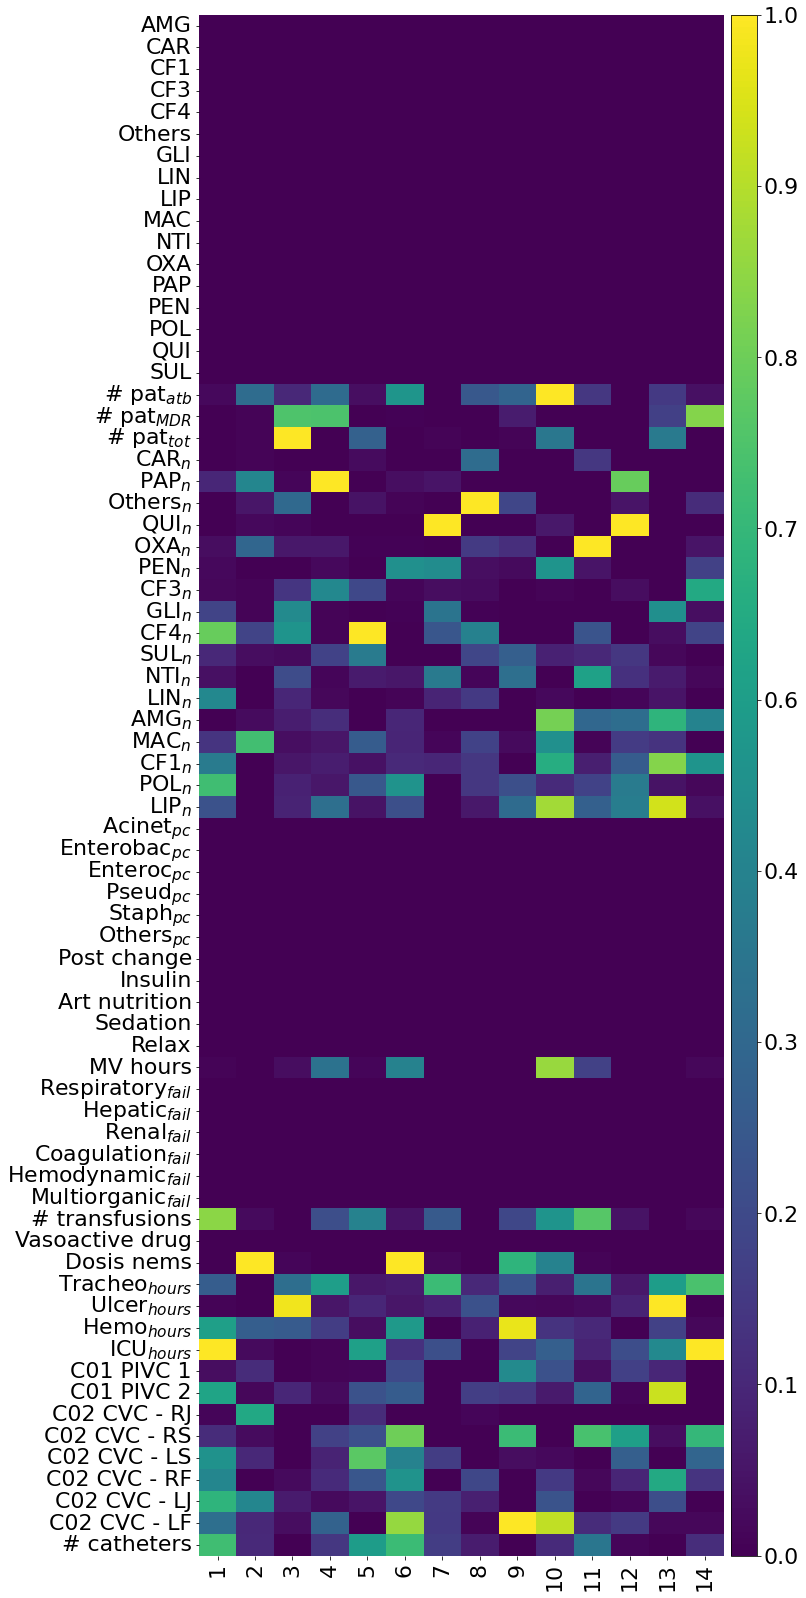

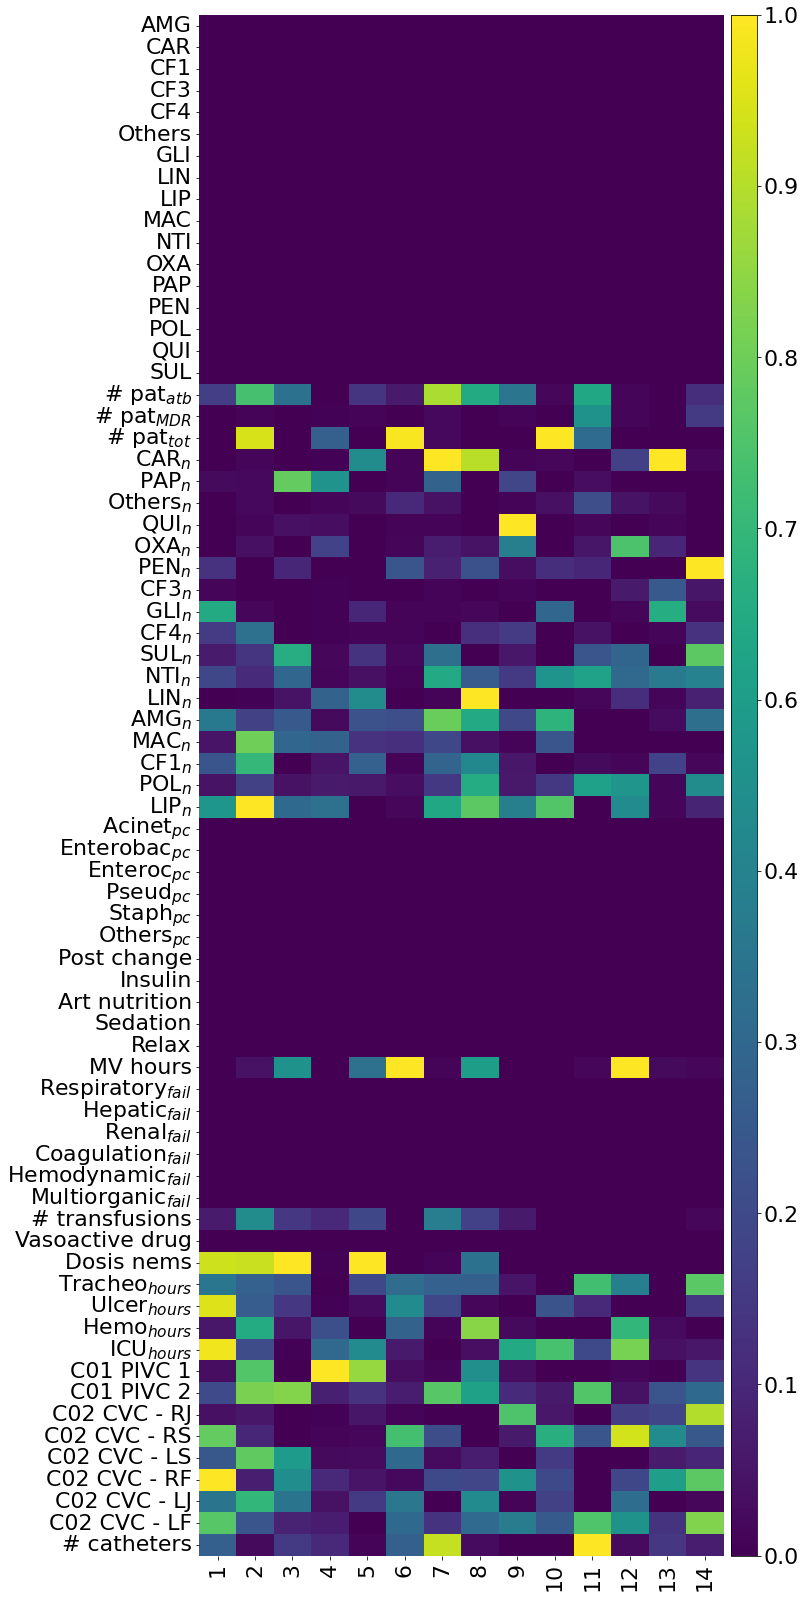

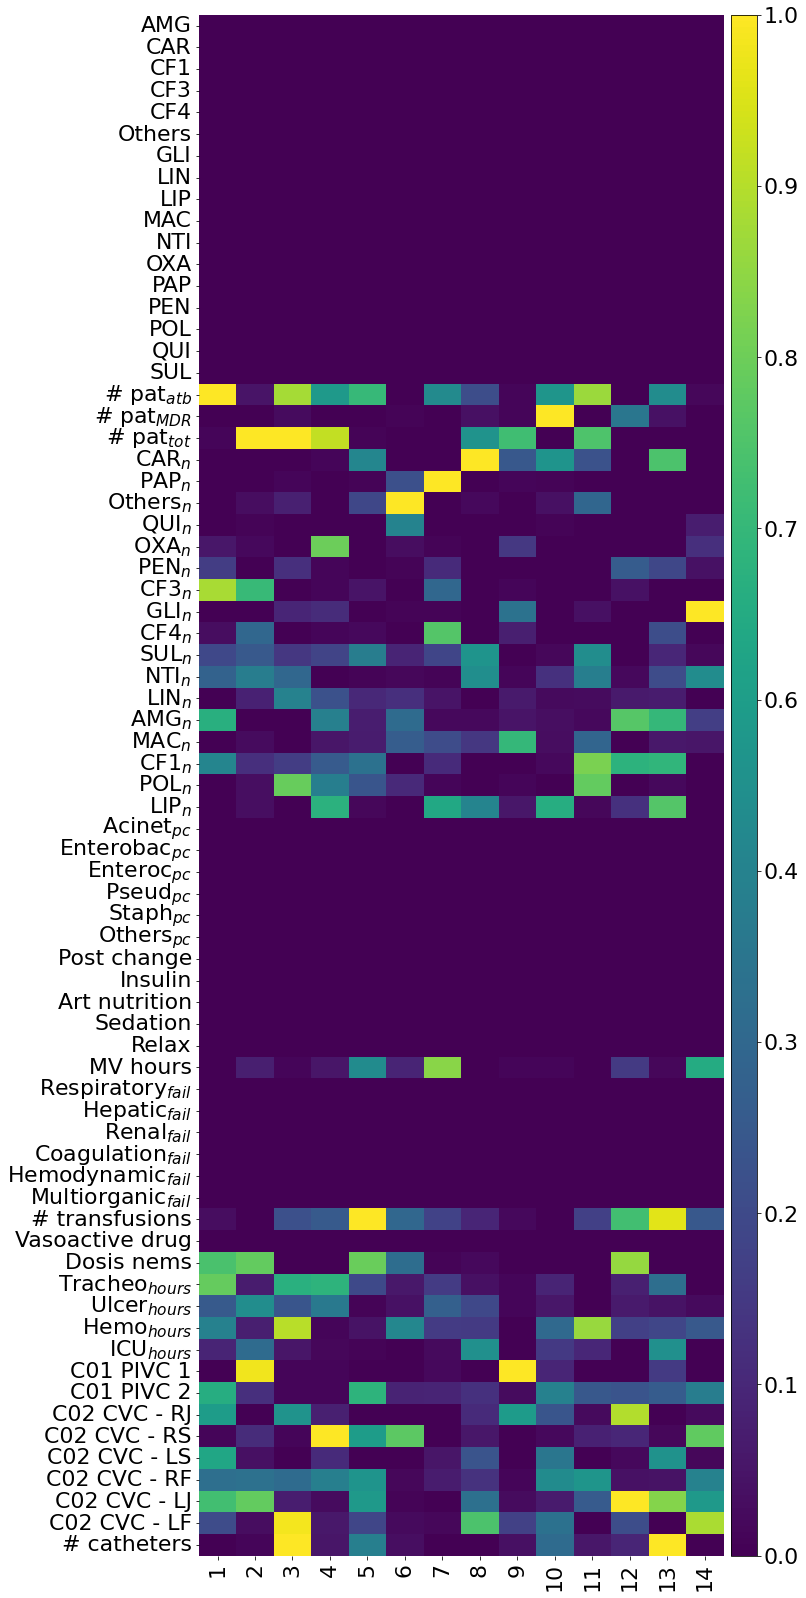

In [6]:
results_noamr = load_from_pickle(os.path.join(split_directory, f"CMI_results_noamr.pkl"))
for split in range(1,4):  
    df = results_noamr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures_VF/CMI-S{split}_nomdr.pdf')
    

## Population analysis

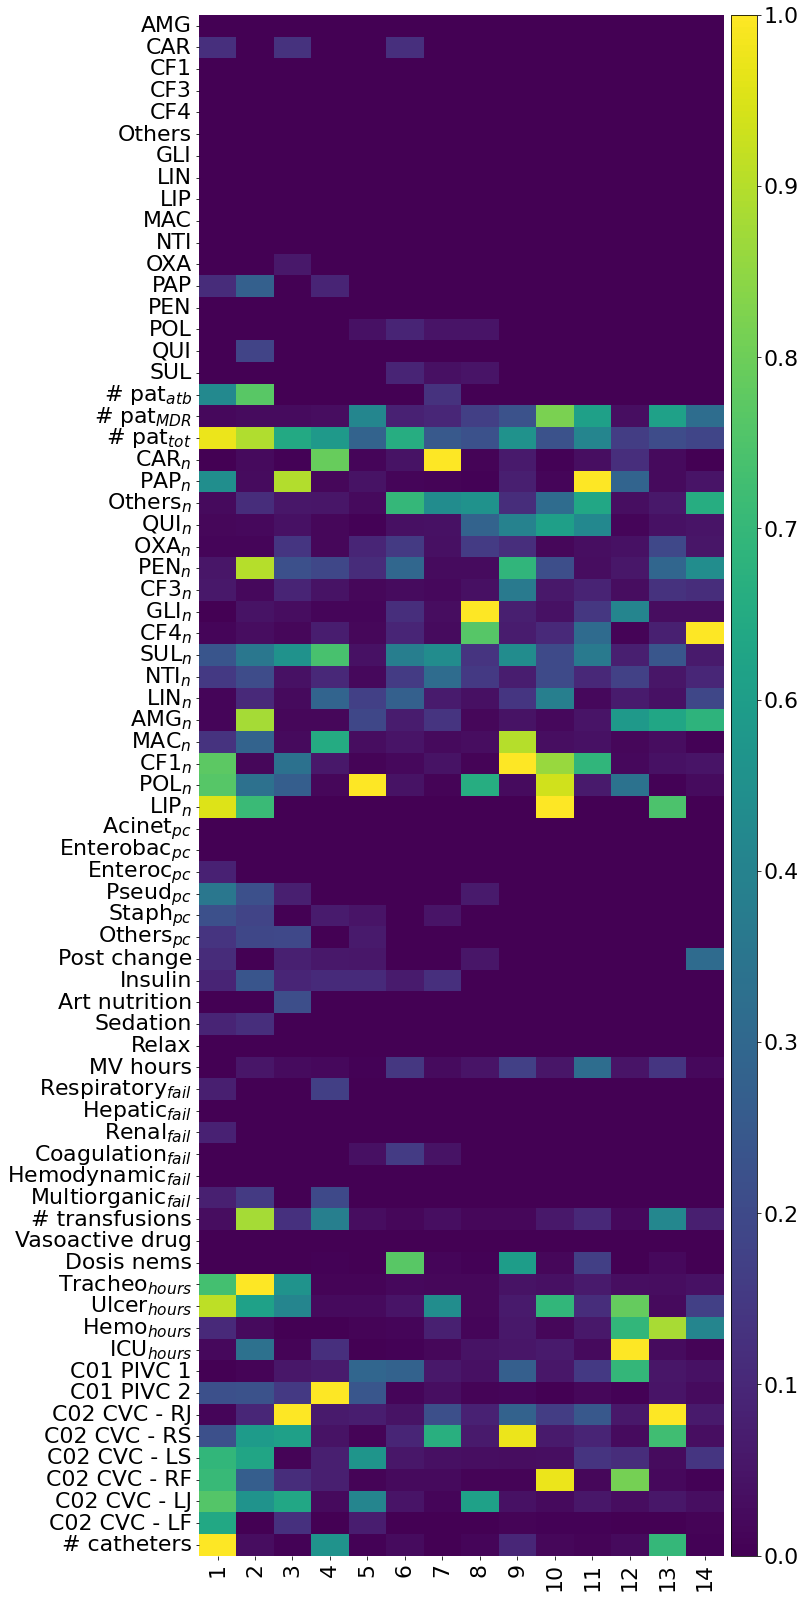

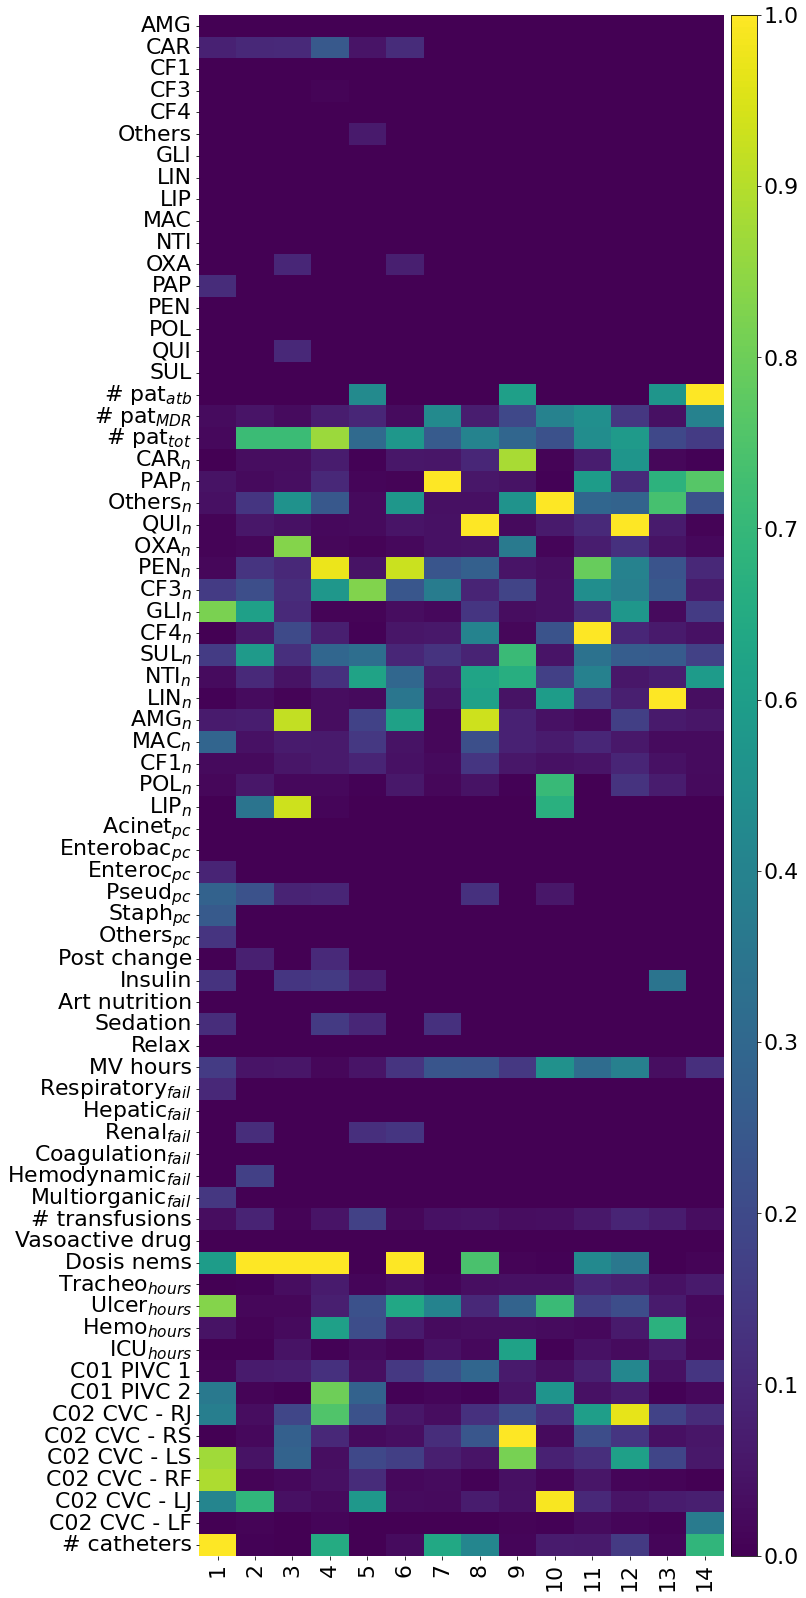

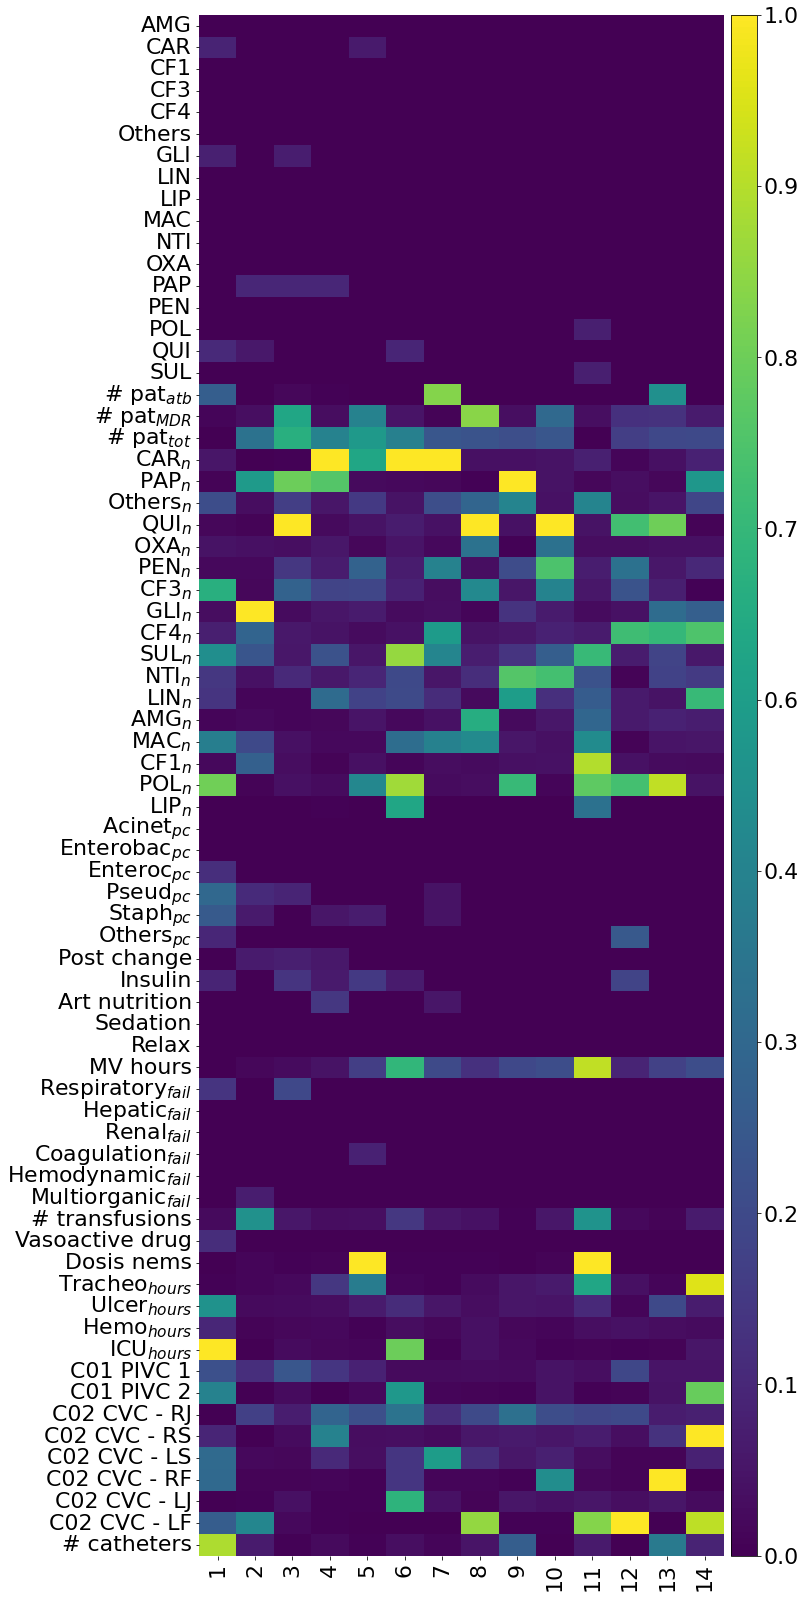

In [7]:
results_pop = load_from_pickle(os.path.join(split_directory, f"CMI_results_population.pkl"))
for split in range(1,4):
    df = results_pop[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures_VF/CMI-S{split}-Population.pdf')